In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from math import pi, inf
from sympy import limit
import time
from scipy.special import jv 
from itertools import product
from scipy import real

def cquad(func, a, b, **kwargs):
    def real_func(x, *args):
        return np.real(func(x, *args))
    def imag_func(x, *args):
        return np.imag(func(x, *args))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], 'Hey Boi')

In [2]:
def Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs): 
    thingy = ( (e2*np.sqrt(k1**2-kp**2)-e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = ( (m2*np.sqrt(k1**2-kp**2)-m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = n2/n1 * (2*e1*np.sqrt(k1**2-kp**2))*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2)))/ ( (e2*np.sqrt(k1**2-kp**2) + e1*np.sqrt(k2**2-kp**2) )*(m1*m2*(m2*np.sqrt(k1**2-kp**2)+m1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy
    
def Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = -2*m2*n1*np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*n2*np.sqrt(k1**2-kp**2)**2*delta/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

def Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    thingy = 2*m2*np.sqrt(k1**2-kp**2)*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2)))/( (m2*np.sqrt(k1**2-kp**2) + m1*np.sqrt(k2**2-kp**2) )*(m1*m2*(e2*np.sqrt(k1**2-kp**2)+e1*np.sqrt(k2**2-kp**2))) + np.sqrt(k1**2-kp**2)*np.sqrt(k2**2-kp**2)*delta**2)
    return thingy

In [111]:
# Parameters 
data1 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi,  'w' : 1, 'm0' : 4*pi*10**(-7)}
data1['w'] = data1['c']*2*pi/(600*10**(-9))
data1["e2"] = 1
data1["m2"] = 2
data1["delta"] = data1["alpha"]*data1["m1"]*data1["m2"]*(data1["theta2"] - data1["theta1"])/pi
data1["k1"] = data1["n1"]*data1["w"]/data1["c"]
data1["n2"] = np.sqrt(data1['e2']*data1['m2'])
data1["k2"] = data1["n2"]*data1["w"]/data1["c"]
data1['scale'] = 1 

data0 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "e2" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0,  'w' : 1, 'm0' : 4*pi*10**(-7)}
data0['w'] = data0['c']*2*pi/(600*10**(-9))
data0["e2"] = 1
data0["m2"] = 2
data0["delta"] = data0["alpha"]*data0["m1"]*data0["m2"]*(data0["theta2"] - data0["theta1"])/pi
data0["k1"] = data0["n1"]*data0["w"]/data0["c"]
data0["n2"] = np.sqrt(data0['e2']*data0['m2'])
data0["k2"] = data0["n2"]*data0["w"]/data0["c"]
data0['scale'] = 1 

#STRENGTH_FACTOR 
SF = ((0.6)**2)*(10**(-12))

In [112]:
def E_x(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    return -(kz/k1)*(np.exp(kz*z*1j+kp*x*1j))*Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs)

def E_y(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    return -((np.exp(-kz*z*1j+kp*x*1j))+(np.exp(kz*z*1j+kp*x*1j))*Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs))

def E_z(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    return (kp/k1)*(np.exp(kz*z*1j+kp*x*1j))*Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs)

def E(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs):
    return np.array([E_x(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs), E_y(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs), E_z(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs)])


ev = np.vectorize(E)

In [113]:
def H_x(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    B_x = -(kz/(m0*m1*w))*((np.exp(-kz*z*1j+kp*x*1j))-(np.exp(kz*z*1j+kp*x*1j))*Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs))
    return B_x

def H_y(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    B_y = -(k1/(m0*m1*w))*(np.exp(kz*z*1j+kp*x*1j))*Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs)
    return B_y

def H_z(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs):
    kz = np.sqrt(k1**2-kp**2)
    B_z = -(kp/(m0*m1*w))*((np.exp(-kz*z*1j+kp*x*1j))+(np.exp(kz*z*1j+kp*x*1j))*Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs))
    return B_z

def H(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs):
    return np.array([H_x(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs), H_y(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs), H_z(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs)])
    
    
hv = np.vectorize(H)

In [114]:
def S(z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs):
    x = 1
    s = (1/2)*(np.cross(E(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, **kwargs), np.conjugate(H(x, z, kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c, w, m0, **kwargs)).T))
    if any(s): return s/np.linalg.norm(s)
    return s

sv = np.vectorize(S,otypes=[list])

In [115]:
print(S(1*(600*10**(-9)),.5*data1['k1'],**data1))
print(S(6*(600*10**(-9)),.5*data1['k1'],**data1))
print()
print(E(1,1,1,**data1))
print(H(1,1,1,**data1))
s= (1/2)*np.real(np.cross(E(1*(600*10**(-9)),1,1,**data1), np.conjugate(H(1*(600*10**(-9)),1,1,**data1))))
print(s/np.linalg.norm(s))
print()
print(E(2,1,1,**data1))
print(H(2,1,1,**data1))
s= (1/2)*np.real(np.cross(E(2*(600*10**(-9)),1,1,**data1), np.conjugate(H(2*(600*10**(-9)),1,1,**data1))))
print(s)
print()
print(E(200000,1,1,**data1))
print(H(200000,1,1,**data1))
s= (1/2)*np.real(np.cross(E(5000000*(600*10**(-9)),1,1,**data1), np.conjugate(H(5000000*(600*10**(-9)),1,1,**data1))))
print(s)

[ 4.88946253e-01-2.02313710e-17j -4.82616958e-04-4.26119159e-03j
 -8.41917882e-01+2.28226753e-01j]
[ 0.42452773-3.27243619e-22j -0.00354431+2.84666972e-03j
 -0.89247392-1.52465848e-01j]

[ 2.29720134e-03-4.45155113e-03j  9.20198875e-01+1.05301893e-01j
 -2.19366569e-10+4.25091820e-10j]
[2.85835364e-03-5.29619512e-04j 6.09351580e-06-1.18081061e-05j
 2.33089098e-10+2.66732812e-11j]
[ 8.44087821e-08 -4.92880181e-10 -1.00000000e+00]

[ 4.98703429e-03-4.72155070e-04j  4.08577086e-01+8.31215509e-01j
 -4.76226696e-10+4.50874880e-11j]
[1.99003451e-03+2.11906701e-03j 1.32285193e-05-1.25243022e-06j
 1.03493785e-10+2.10549348e-10j]
[ 1.08651715e-10 -6.34439632e-13 -1.28720865e-03]

[-2.80823956e-03-4.14816008e-03j  5.33035367e-01-7.57448187e-01j
  2.68167125e-10+3.96120109e-10j]
[ 9.03603406e-04-2.76300257e-03j -7.44908680e-06-1.10033363e-05j
  1.35019436e-10-1.91863867e-10j]
[ 1.08651715e-10 -6.34439632e-13 -1.28720865e-03]


In [116]:
o = pi/4
kp = np.sin(o)*data1['k1']
zs = np.arange(0, 3, 0.01)*(600*10**(-9))

s_values = sv(zs, kp, **data1)
s_values_y = [s[1] for s in s_values]

s_values_notopo = sv(zs, kp, **data0)
s_values_notopo_y = [s[1] for s in s_values_notopo]

C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


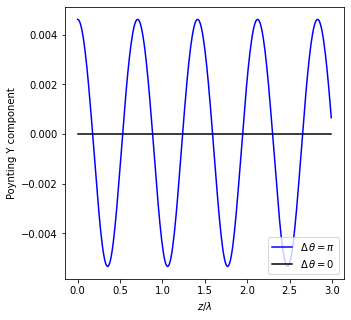

In [117]:
fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_topo, = ax.plot(zs/(600*10**(-9)), s_values_y, color= 'blue', label=r'$\Delta\,\theta=\pi$') 
ax_no_topo, = ax.plot(zs/(600*10**(-9)), s_values_notopo_y, color= 'black', label=r'$\Delta\,\theta=0$') 

ax.legend(handles=[ax_topo, ax_no_topo], prop={'size': 10})
ax.set_ylabel(r'Poynting Y component')
ax.set_xlabel(r'$z/\lambda$')
plt.show()

fig.savefig('poynting_other/Poynting Y 45 degrees ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


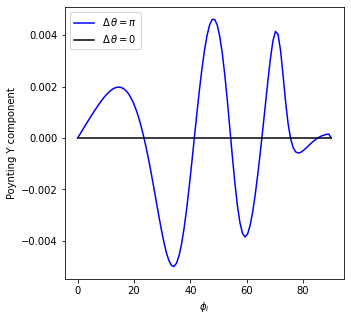

In [118]:
os = np.arange(0, 1.01, 0.01)*pi/2
kp = np.sin(os)*data1['k1']
zs = 1.5*(600*10**(-9))

s_values = sv(zs, kp, **data1)
s_values_y = [s[1] for s in s_values]

s_values_notopo = sv(zs, kp, **data0)
s_values_notopo_y = [s[1] for s in s_values_notopo]

fig, ax = plt.subplots(figsize=(5,5))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax_topo, = ax.plot(os*180/pi, s_values_y, color= 'blue', label=r'$\Delta\,\theta=\pi$') 
ax_no_topo, = ax.plot(os*180/pi, s_values_notopo_y, color= 'black', label=r'$\Delta\,\theta=0$') 

ax.legend(handles=[ax_topo, ax_no_topo], prop={'size': 10})
ax.set_ylabel(r'Poynting Y component')
ax.set_xlabel(r'$\phi_i$')
plt.show()

fig.savefig('poynting_other/Poynting Y 45 degrees ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Eitan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: Compl

KeyboardInterrupt: 

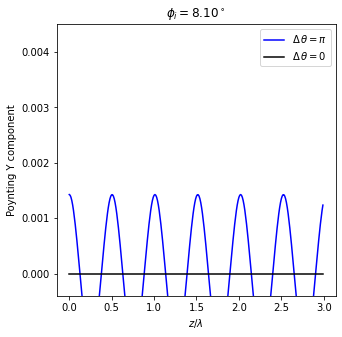

In [87]:
os = np.arange(0, 1.01, 0.01)*pi/2
ymin, ymax = -0.0004, 0.0045

counter = 0
for o in os: 
    counter += 1
    kp = np.sin(o)*data1['k1']
    zs = np.arange(0, 3, 0.01)*(600*10**(-9))

    s_values = sv(zs, kp, **data1)
    s_values_y = [s[1] for s in s_values]

    s_values_notopo = sv(zs, kp, **data0)
    s_values_notopo_y = [s[1] for s in s_values_notopo]

    fig, ax = plt.subplots(figsize=(5,5))
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    ax_topo, = ax.plot(zs/(600*10**(-9)), s_values_y, color= 'blue', label=r'$\Delta\,\theta=\pi$') 
    ax_no_topo, = ax.plot(zs/(600*10**(-9)), s_values_notopo_y, color= 'black', label=r'$\Delta\,\theta=0$') 

    ax.legend(handles=[ax_topo, ax_no_topo], prop={'size': 10})
    ax.set_ylabel(r'Poynting Y component')
    ax.set_xlabel(r'$z/\lambda$')
    ax.set_title(r'$\phi_i={:.2f}^\circ$'.format(180*o/pi))
    ax.set_ylim([ymin, ymax])
    fig.savefig('poynting_giff/{}'.format(counter), bbox_inches='tight')
    plt.close()

print('done')



In [119]:
#G0
def G0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    thing = np.e**(1j*k*R)/(4*pi*R)*((1 + (1j*k*R-1)/(k**2*R**2))*Id+ (3-3j*k*R-k**2*R**2)/(k**2*R**4)*np.outer(Rv,Rv))
    return thing

def G0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    thing = G0(x,y,z,zp=zp,data=data)[0,0]
    if abs(thing) >= 10**(9): return 0
    return thing

def G0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,0]

def G0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,0]

def G0_xy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[0,1]

def G0_yy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,1]

def G0_zy(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,1]

def G0_xz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[0,2]

def G0_yz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[1,2]

def G0_zz(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return G0(x,y,z,zp=zp,data=data)[2,2]

G0zz = np.vectorize(G0_zz)
G0yz = np.vectorize(G0_yz)
G0xz = np.vectorize(G0_xz)
G0xx = np.vectorize(G0_xx)
G0yx = np.vectorize(G0_yx)
G0zx = np.vectorize(G0_zx)
G0xy = np.vectorize(G0_xy)
G0yy = np.vectorize(G0_yy)
G0zy = np.vectorize(G0_zy)

In [120]:
# Green 2-Layers
def GRzz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return (1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])

def GRyz_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])

def GRxz_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm

def GRxx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm)

def GRyx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte)

def GRzx_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm

def GRyy_integrand(kp, x, y, z, zp, data=data1):
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm)

def GRxy_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte)

def GRzy_integrand(kp, x, y, z, zp, data=data1):
    rtmte = Rtmte(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte

def G_xz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zz(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzz_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_xy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRxy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_yy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRyy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def G_zy(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(GRzy_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

Gzz = np.vectorize(G_zz)
Gyz = np.vectorize(G_yz)
Gxz = np.vectorize(G_xz)
Gxx = np.vectorize(G_xx)
Gyx = np.vectorize(G_yx)
Gzx = np.vectorize(G_zx)
Gxy = np.vectorize(G_xy)
Gyy = np.vectorize(G_yy)
Gzy = np.vectorize(G_zy)

In [121]:
#Magnetic Field 
def MRxx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*(jv(0,kp*np.sqrt(x**2+y**2))-(kp**2/(k1*np.sqrt(k1**2-kp**2)))*jv(2,kp*np.sqrt(x**2+y**2)))*kp*rtetm

def MRyx_integrand(kp, x, y, z, zp, data=data1):
    k1 = data["k1"]
    kz = np.sqrt(k1**2-kp**2)
    rtete = Rtete(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    rtmtm = Rtmtm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*kp*(rtete-rtmtm) + jv(2,kp*np.sqrt(x**2+y**2))*rtmtm*(2*kp*kz**2/k1**2))

def MRzx_integrand(kp, x, y, z, zp, data=data1):
    rtetm = Rtetm(kp, data["e1"], data["e2"], data["k1"], data["k2"], data["m1"], data["m2"], data["n1"], data["n2"], data["delta"], data["c"])
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/np.sqrt(k1**2-kp**2)**2)*rtetm


def M_xx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRxx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def M_yx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRyx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

def M_zx(x, y, z, zp=1.5*600*10**(-9), data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRzx_integrand, 0, data1['k1'], args=(x,y,z,zp,data,))[0]

In [122]:
#M0
def M0(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    w = data['w']
    k = data['k1']
    R = np.sqrt((x-xp)**2+(y-yp)**2+(z-zp)**2)
    Id = np.array([[1,0,0],[0,1,0],[0,0,1]])
    Rv = np.array([x-xp,y-yp,z-zp])
    return (np.e**(1j*k*R)/(4*pi*R))*(1j*k-1/R)*np.cross(Rv/R,Id)

def M0_xx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[0,0]

def M0_yx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[1,0]

def M0_zx(x,y,z,zp=1.5*600*10**(-9),data=data1):
    return M0(x,y,z,zp=zp,data=data)[2,0]


M0xx = np.vectorize(G0_xx)
M0yx = np.vectorize(G0_yx)
M0zx = np.vectorize(G0_zx)

In [123]:
def S0_dipole(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return s

S0v_dipole = np.vectorize(S0_dipole, otypes=[list])

In [124]:
def S_dipole(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    if not any([x,y,z-zp]): return 0
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data)+M_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data)+M_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)+M_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data)+G_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data)+G_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)+G_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return -s#/np.linalg.norm(s)

Sv_dipole = np.vectorize(S_dipole, otypes=[list])

In [125]:
S_dipole(1,1,1)

<ipython-input-1-477fbd0510f0>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  real_integral = quad(real_func, a, b, **kwargs)
<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  imag_integral = quad(imag_func, a, b, **kwargs)
<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)
<ipython-input-1-477fbd0510f0>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing th

array([-8.94520850e+26, -3.12479360e+26,  1.03941463e+27])

In [126]:
r = 3
p = 30
par = 2*r/p
zc = 1.5*(600*10**(-9))
xs = np.arange(-r, r+par, par)*(600*10**(-9))
ys = np.arange(-r, r+par, par)*(600*10**(-9))
x,y = np.meshgrid(xs,ys)

In [127]:
start = time.time()
s0_values = S0v_dipole(x, y, zc, data=data1)
end = time.time()
print('** elapsed time for topo calculations: {} seg'.format(end - start))

** elapsed time for topo calculations: 0.229172945022583 seg


Text(0, 0.5, '$\\hat{k}$')

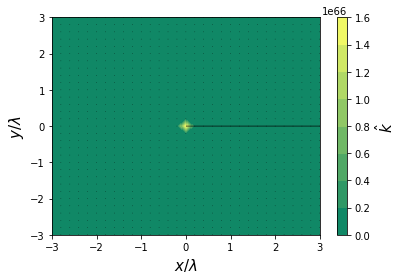

In [128]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = -s0_values*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = [[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values]
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$\hat{k}$', size=15)
# fig.savefig('poynting_other/Poynting Dipole Diff ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

Text(0, 0.5, '$|\\hat{k}_\\theta-\\hat{k}_0|$')

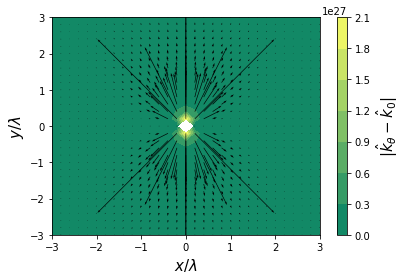

In [129]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = -s0_values*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**(33)
mask2 = new_norms<10**(33)
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)
# fig.savefig('poynting_other/Poynting Dipole Diff Masked ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

In [130]:
start = time.time()
s_values = Sv_dipole(x, y, zc, data=data1)
end = time.time()
print('** elapsed time for topo calculations: {} seg'.format(end - start))

<ipython-input-1-477fbd0510f0>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  real_integral = quad(real_func, a, b, **kwargs)
<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


** elapsed time for topo calculations: 169.59286499023438 seg


In [131]:
start = time.time()
s_values_notopo = Sv_dipole(x, y, zc, data=data0)
end = time.time()
print('** elapsed time for notopo calculations: {} seg'.format(end - start))

<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


** elapsed time for notopo calculations: 109.63149309158325 seg


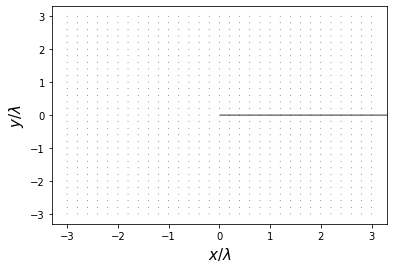

In [132]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))

U = np.array([[s[0] for s in row] for row in s_values_notopo])
V = np.array([[s[1] for s in row] for row in s_values_notopo])
# U = U/np.max(U) 
# V = V/np.max(V) 

fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
fig.savefig('poynting_other/Poynting Dipole Nontopo ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

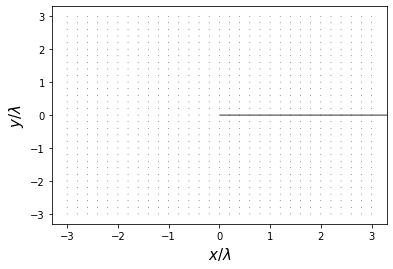

In [133]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))

U = np.array([[s[0] for s in row] for row in s_values])
V = np.array([[s[1] for s in row] for row in s_values])
# U = U/np.max(U) 
# V = V/np.max(V) 

fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
fig.savefig('poynting_other/Poynting Dipole topo ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

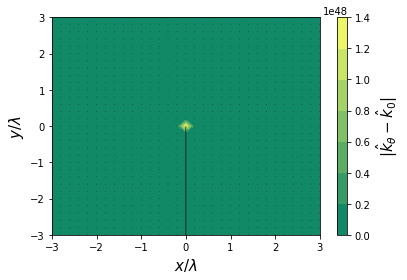

In [134]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values - s_values_notopo)*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = [[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values]
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)
fig.savefig('poynting_other/Poynting Dipole Diff ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

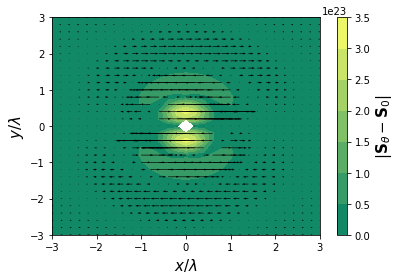

In [135]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values - s_values_notopo)*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**40
mask2 = new_norms<10**40
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\mathbf{S}_\theta-\mathbf{S}_0|$', size=15)
fig.savefig('plots_report/Poynting Dipole Diff Masked ep={},mu={}'.format(data1['e2'], data1['m2']), bbox_inches='tight')

In [136]:
print(new_norms[0])

[7.15860705e+21 8.35931743e+21 9.44671280e+21 1.02453866e+22
 1.08182518e+22 1.11562666e+22 1.10699593e+22 1.04449784e+22
 9.37883585e+21 8.04496370e+21 6.57146399e+21 5.06235271e+21
 3.64852099e+21 2.48660144e+21 1.72241146e+21 1.45597559e+21
 1.72241070e+21 2.48660011e+21 3.64851943e+21 5.06235125e+21
 6.57146261e+21 8.04496173e+21 9.37883246e+21 1.04449740e+22
 1.10699561e+22 1.11562656e+22 1.08182511e+22 1.02453843e+22
 9.44671083e+21 8.35931805e+21 7.15860770e+21]


In [137]:
def S_dipole_r2(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=data1):
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data)+M_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data)+M_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)+M_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data)+G_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data)+G_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)+G_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return -s*(x**2+y**2+(z-zp)**2)

Sv_dipole_r2 = np.vectorize(S_dipole_r2, otypes=[list])

In [138]:
start = time.time()
s_values_r2 = Sv_dipole_r2(x, y, zc, data=data1)
end = time.time()
print('** elapsed time for topo calculations: {} seg'.format(end - start))

<ipython-input-1-477fbd0510f0>:16: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  real_integral = quad(real_func, a, b, **kwargs)
<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


** elapsed time for topo calculations: 173.59610080718994 seg


In [139]:
start = time.time()
s_values_notopo_r2 = Sv_dipole_r2(x, y, zc, data=data0)
end = time.time()
print('** elapsed time for topo calculations: {} seg'.format(end - start))

<ipython-input-1-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


** elapsed time for topo calculations: 110.61259531974792 seg


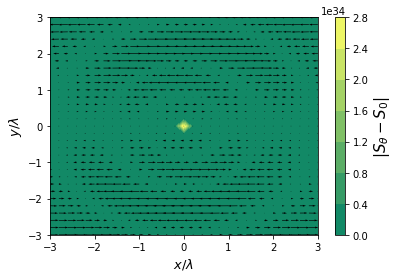

In [140]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values_r2 - s_values_notopo_r2)
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = [[np.linalg.norm([v[0],v[1],v[2]]) for v in row] for row in new_values]
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=13)
ax.set_ylabel(r'$y/\lambda$', size=13)
cb.ax.set_ylabel(r'$|S_\theta-S_0|$', size=15)
fig.savefig('poynting_other/Poynting Dipole Diff ep={},mu={} r2'.format(data1['e2'], data1['m2']), bbox_inches='tight')

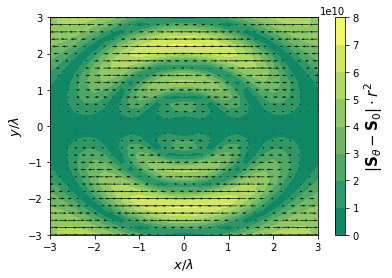

In [141]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = (s_values_r2 - s_values_notopo_r2)*SF
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>10**15
mask2 = new_norms<10**15
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=13)
ax.set_ylabel(r'$y/\lambda$', size=13)
cb.ax.set_ylabel(r'$|\mathbf{S}_\theta-\mathbf{S}_0|\cdot r^2$', size=15)
fig.savefig('plots_report/Poynting Dipole Diff Masked ep={},mu={} xr^2'.format(data1['e2'], data1['m2']), bbox_inches='tight')

In [26]:
dataMu3 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : pi, "theta3": 0,  "w" : 1, 'm0' : 4*pi*10**(-7)}
dataMu3['w'] = dataMu3['c']*2*pi/(600*10**(-9))
dataMu3["e2"] = 16
dataMu3["m2"] = 1
dataMu3["n2"] = np.sqrt(dataMu3["m2"]*dataMu3["e2"])
dataMu3["e3"] = 1
dataMu3["m3"] = 10**5
dataMu3["n3"] = 10**(5/2)
dataMu3["k1"] = dataMu3["n1"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k2"] = dataMu3["n2"]*dataMu3["w"]/dataMu3["c"]
dataMu3["k3"] = dataMu3["n3"]*dataMu3["w"]/dataMu3["c"]
dataMu3["delta"] = dataMu3["alpha"]*dataMu3["m1"]*dataMu3["m2"]*(dataMu3["theta1"] - dataMu3["theta2"])/pi
dataMu3["scale"] = 1
dataMu3["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu3["dist23"] = 0

dataMu2 = {"alpha" : 1/137, "c" : 3*10**8, "m1" : 1, "m2" : 1, "e1" : 1, "n1" : 1, "theta1" : 0, "theta2" : 0, "theta3": 0,  "w" : 1, 'm0' : 4*pi*10**(-7)}
dataMu2['w'] = dataMu2['c']*2*pi/(600*10**(-9))
dataMu2["e2"] = 16
dataMu2["m2"] = 1
dataMu2["n2"] = np.sqrt(dataMu2["m2"]*dataMu2["e2"])
dataMu2["e3"] = 1
dataMu2["m3"] = 10**5
dataMu2["n3"] = 10**(5/2)
dataMu2["k1"] = dataMu2["n1"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k2"] = dataMu2["n2"]*dataMu2["w"]/dataMu2["c"]
dataMu2["k3"] = dataMu2["n3"]*dataMu2["w"]/dataMu2["c"]
dataMu2["delta"] = dataMu2["alpha"]*dataMu2["m1"]*dataMu2["m2"]*(dataMu2["theta1"] - dataMu2["theta2"])/pi
dataMu2["scale"] = 1
dataMu2["dist12"] = 100*10**(-9) #esto esta a escala 600nm (son 100nm - visto de un paper en donde trbajaban con thin films de 1000 Amstrong)
dataMu2["dist23"] = 0

In [27]:
# Reflection Matrix 3-Layer
def ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    # print(e1, e2, k1, k2, m1, m2, n1, n2)
    return np.array([[Rtete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Rtmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Rtmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c):
    return np.array([[Ttete(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttetm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)], [Ttmte(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c), Ttmtm(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta, c)]])

def VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    r21 = ReflectiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    return np.array([[1,0],[0,1]]) - np.e**(2j*np.sqrt(k2**2-kp**2)*(dist12-dist23))*(r21.dot(r23))

def ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha):
    # print(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)
    delta21 =  alpha*m2*m1*(theta1 - theta2)/pi
    delta23 =  alpha*m2*m3*(theta3 - theta2)/pi
    delta12 =  alpha*m1*m2*(theta2 - theta1)/pi
    r12 = ReflectiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    t21 = TransmisiveMatrix(kp, e2, e1, k2, k1, m2, m1, n2, n1, delta21, c)
    r23 = ReflectiveMatrix(kp, e2, e3, k2, k3, m2, m3, n2, n3, delta23, c)
    M = np.linalg.inv(VelocityMatrix(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha))
    t12 = TransmisiveMatrix(kp, e1, e2, k1, k2, m1, m2, n1, n2, delta12, c)
    M2 = t21.dot(r23).dot(M).dot(t12)
    return  r12 + np.e**(-2j*np.sqrt(k2**2-kp**2)*(dist23-dist12))*M2


def RteteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,0]
    return thingy

def RtetmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[0,1]
    return thingy

def RtmtmMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,1]
    return thingy

def RtmteMU(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, delta, c, dist12, dist23, theta1, theta2, theta3, alpha, **kwargs):
    thingy = ThreeLayerReflexive(kp, e1, e2, e3, k1, k2, k3, m1, m2, m3, n1, n2, n3, c, dist12, dist23, theta1, theta2, theta3, alpha)[1,0]
    return thingy

In [28]:
# Green 3-Layers
def GRMuzz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1j/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(0,kp*np.sqrt(x**2+y**2))*(kp**3/(k1**2*np.sqrt(k1**2-kp**2)))*RtmtmMU(kp, **data))

def GRMuyz_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*RtetmMU(kp, **data))

def GRMuxz_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuxx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuyx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    k1 = data["k1"]
    return np.imag((-1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/k1**2)*rtmtm)

def GRMuyy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmtm = RtmtmMU(kp, **data)
    rtete = RteteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/(np.sqrt(k1**2-kp**2)))*rtete - (jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp*np.sqrt(k1**2-kp**2)/k1**2)*rtmtm))

def GRMuxy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtetm + (jv(0,kp*np.sqrt(x**2+y**2)) - jv(2,kp*np.sqrt(x**2+y**2)))*(kp/k1)*rtmte))

def GRMuzy_integrand(kp, x, y, z, zp, data=dataMu2):
    rtmte = RtmteMU(kp, **data)
    k1 = data["k1"]
    return np.imag((1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/(k1*np.sqrt(k1**2-kp**2)))*rtmte)

#Integrating...
def GMu_xz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zz(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzz_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_xy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuxy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_yy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuyy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def GMu_zy(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return quad(GRMuzy_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

GMuzz = np.vectorize(GMu_zz)
GMuyz = np.vectorize(GMu_yz)
GMuxz = np.vectorize(GMu_xz)
GMuxx = np.vectorize(GMu_xx)
GMuyx = np.vectorize(GMu_yx)
GMuzx = np.vectorize(GMu_zx)
GMuxy = np.vectorize(GMu_xy)
GMuyy = np.vectorize(GMu_yy)
GMuzy = np.vectorize(GMu_zy)

In [29]:
#Magnetic Field 3 Layer
def MRMuxx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    k1 = data["k1"]
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*(jv(0,kp*np.sqrt(x**2+y**2))-(kp**2/(k1*np.sqrt(k1**2-kp**2)))*jv(2,kp*np.sqrt(x**2+y**2)))*kp*rtetm

def MRMuyx_integrand(kp, x, y, z, zp, data=dataMu2):
    k1 = data["k1"]
    kz = np.sqrt(k1**2-kp**2)
    rtete = RteteMU(kp, **data)
    rtmtm = RtmtmMU(kp, **data)
    return (1j/(8*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*((jv(0,kp*np.sqrt(x**2+y**2)) + jv(2,kp*np.sqrt(x**2+y**2)))*kp*(rtete-rtmtm) + jv(2,kp*np.sqrt(x**2+y**2))*rtmtm*(2*kp*kz**2/k1**2))

def MRMuzx_integrand(kp, x, y, z, zp, data=dataMu2):
    rtetm = RtetmMU(kp, **data)
    k1 = data["k1"]
    return (1/(4*pi))*(np.e**(1j*np.sqrt(k1**2-kp**2)*(z + zp)))*jv(1,kp*np.sqrt(x**2+y**2))*(kp**2/np.sqrt(k1**2-kp**2)**2)*rtetm


def MMu_xx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRMuxx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def MMu_yx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRMuyx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

def MMu_zx(x, y, z, zp=1.5*600*10**(-9), data=dataMu2):
    x,y,z,zp = x*data['scale'], y*data['scale'], z*data['scale'], zp*data['scale']
    return cquad(MRMuzx_integrand, 0, data['k1'], args=(x,y,z,zp,data,))[0]

In [30]:
def SMu_dipole(x,y,z,zp=1.5*600*10**(-9),xp=0,yp=0,data=dataMu2):
    H = (1/(data['m0']*data['m1']))*np.array([M0_xx(x,y,z,zp,data)+MMu_xx(x,y,z,zp,data), M0_yx(x,y,z,zp,data)+MMu_yx(x,y,z,zp,data), M0_zx(x,y,z,zp,data)+MMu_zx(x,y,z,zp,data)])
    E = 1j*data['w']*np.array([G0_xx(x,y,z,zp,data)+GMu_xx(x,y,z,zp,data), G0_yx(x,y,z,zp,data)+GMu_yx(x,y,z,zp,data), G0_zx(x,y,z,zp,data)+GMu_zx(x,y,z,zp,data)])
    s = (1/2)*np.real(np.cross(E,np.conjugate(H)))
    return s/np.linalg.norm(s)

SMuv_dipole = np.vectorize(SMu_dipole, otypes=[list])

In [31]:
start = time.time()
smu_values = SMuv_dipole(x, y, zc, data=dataMu3)
end = time.time()
print('** elapsed time for topo calculations: {} seg'.format(end - start))


<ipython-input-2-477fbd0510f0>:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)


In [ ]:
start = time.time()
smu_values_notopo = SMuv_dipole(x, y, zc, data=dataMu2)
end = time.time()
print('** elapsed time for notopo calculations: {} seg'.format(end - start))

** elapsed time for notopo calculations: 1245.4768640995026 seg


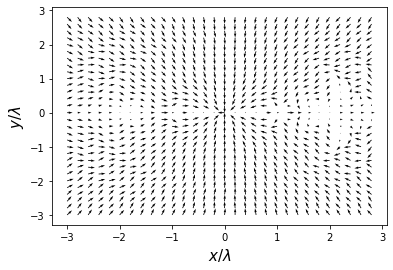

In [ ]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))

U = np.array([[s[0] for s in row] for row in smu_values_notopo])
V = np.array([[s[1] for s in row] for row in smu_values_notopo])
# U = U/np.max(U) 
# V = V/np.max(V) 

fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
fig.savefig('poynting_other/MU_Poynting Dipole Nontopo ep={},mu={}'.format(dataMu2['e2'], dataMu2['m2']), bbox_inches='tight')

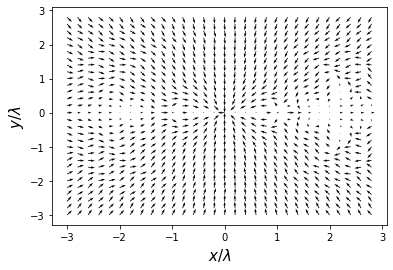

In [ ]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))

U = np.array([[s[0] for s in row] for row in smu_values])
V = np.array([[s[1] for s in row] for row in smu_values])
# U = U/np.max(U) 
# V = V/np.max(V) 

fig, ax = plt.subplots()
ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
fig.savefig('poynting_other/MU_Poynting Dipole Nontopo ep={},mu={}'.format(dataMu2['e2'], dataMu2['m2']), bbox_inches='tight')

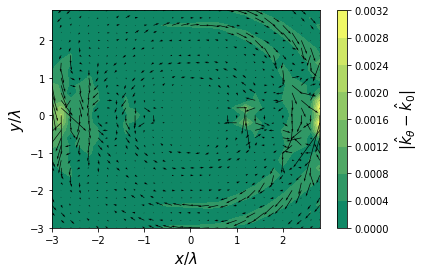

In [ ]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = smu_values - smu_values_notopo
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = [[np.linalg.norm([v[0],v[1]]) for v in row] for row in new_values]
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, new_norms, cmap='summer')
cb = fig.colorbar(ax2)
ax1 = ax.quiver(X, Y, U, V)
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)
fig.savefig('poynting_other/MU_Poynting Dipole Diff ep={},mu={}'.format(dataMu2['e2'], dataMu2['m2']), bbox_inches='tight')

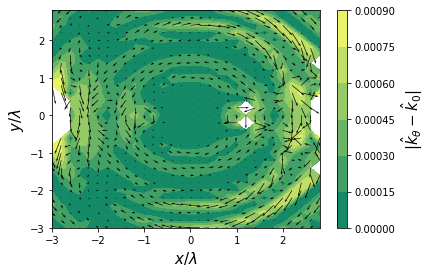

In [ ]:
X,Y = np.meshgrid(xs/(600*10**(-9)),ys/(600*10**(-9)))
new_values = smu_values - smu_values_notopo
#new_values = [[v/np.linalg.norm(v) for v in row] for row in new_values]
new_norms = np.array([np.array([np.linalg.norm([v[0],v[1]]) for v in row]) for row in new_values])
mask = new_norms>0.001
mask2 = new_norms<0.001
U = np.array([[s[0] for s in row] for row in new_values])
V = np.array([[s[1] for s in row] for row in new_values])

masked_new_norms = np.ma.array(new_norms, mask=mask)

fig, ax = plt.subplots()
ax2 = ax.contourf(X,Y, masked_new_norms, cmap='summer')
cb = fig.colorbar(ax2)
#ax2 = plt.quiver(X, Y, U, V)
ax2 = plt.quiver(X[mask2], Y[mask2], U[mask2], V[mask2])
ax.set_xlabel(r'$x/\lambda$', size=15)
ax.set_ylabel(r'$y/\lambda$', size=15)
cb.ax.set_ylabel(r'$|\hat{k}_\theta-\hat{k}_0|$', size=15)
fig.savefig('poynting_other/Poynting Dipole Diff Masked ep={},mu={}'.format(dataMu2['e2'], dataMu2['m2']), bbox_inches='tight')